In [37]:
import cv2
import matplotlib.pyplot as plt

In [38]:
img=cv2.imread('img/coins5.jpg')
type(img)

numpy.ndarray

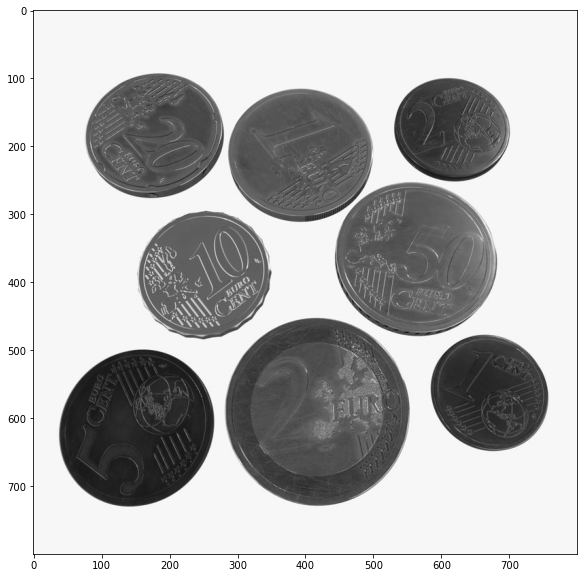

In [39]:
gray_img=img.copy()
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,10))
plt.imshow(gray_img, cmap='gray')

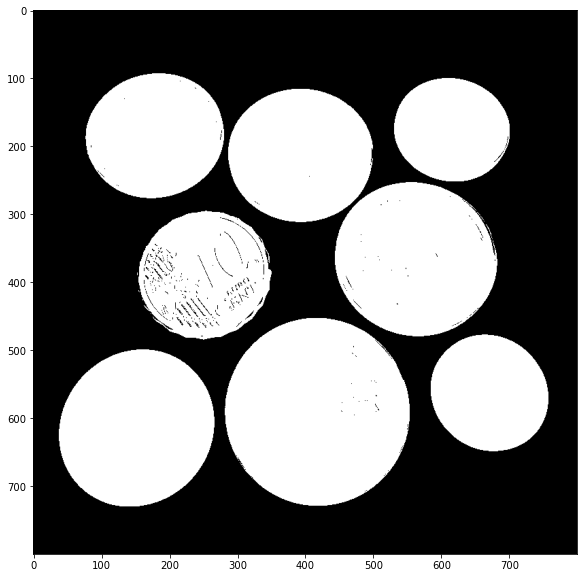

In [40]:
retval, threshold= cv2.threshold(gray_img, 200,255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(15,10))
plt.imshow(threshold, cmap='gray')

In [41]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [42]:
len(contours)

19

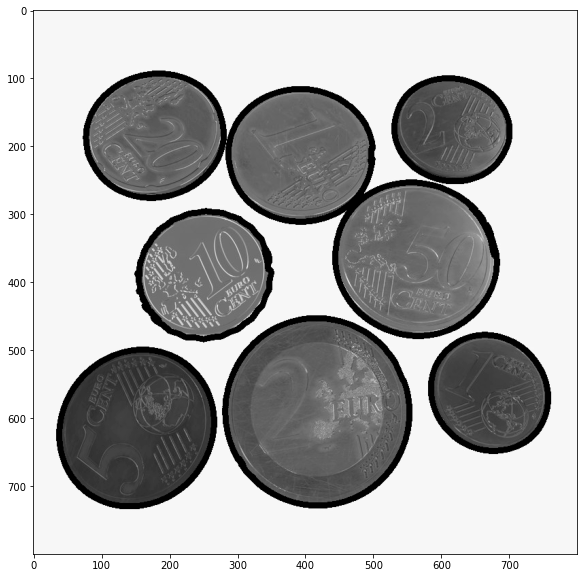

In [45]:
copy_img=gray_img.copy()
drawing=cv2.drawContours(copy_img, contours, -1, (0,255,0),7)
plt.figure(figsize=(15,10))
plt.imshow(drawing, cmap='gray')

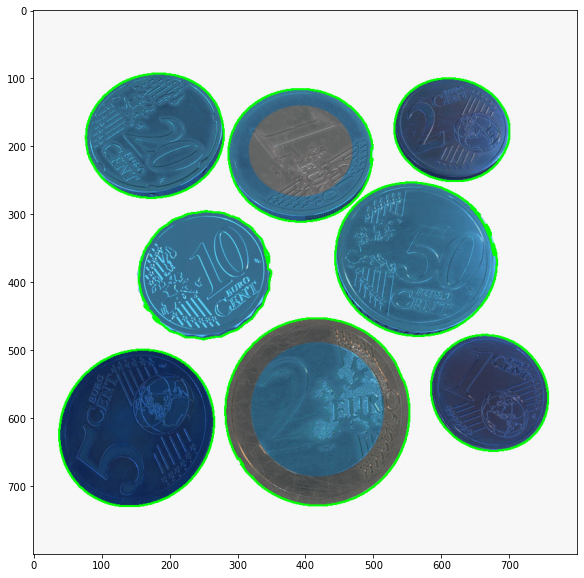

In [46]:
sorted_contours=sorted(contours, key=cv2.contourArea, reverse=True)
copy_img=img.copy()
drawing=cv2.drawContours(copy_img, sorted_contours[0:9], -1, (0,255,0),2)
plt.figure(figsize=(15,10))
plt.imshow(drawing, cmap='gray')

In [47]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

#### Bounding rectangle

In [49]:
clean_contours=sorted_contours[0:9]
x,y,w,h = cv2.boundingRect(clean_contours[0])

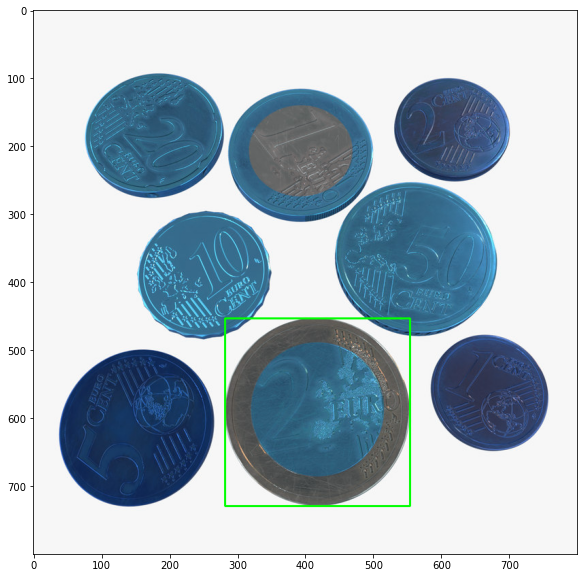

In [51]:
copy=img.copy()
rect=cv2.rectangle(copy, (x,y), (x+w, y+h),(0,255,0), 2)
plt.figure(figsize=(15,10))
plt.imshow(rect)

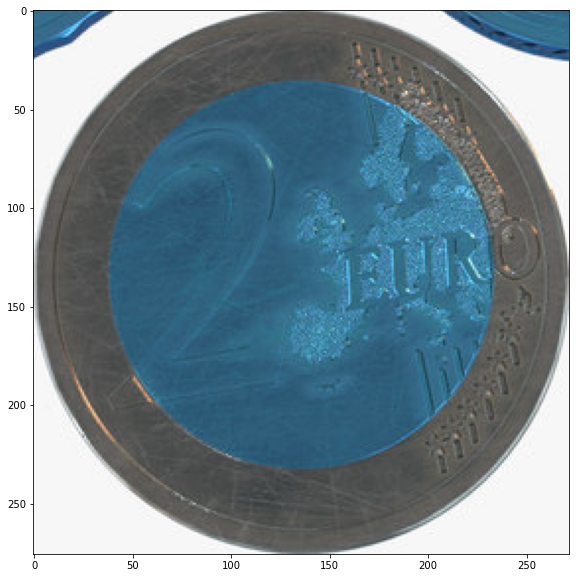

In [52]:
two_euro_coin=img[y:y+h, x:x+w]
plt.figure(figsize=(15,10))
plt.imshow(two_euro_coin)

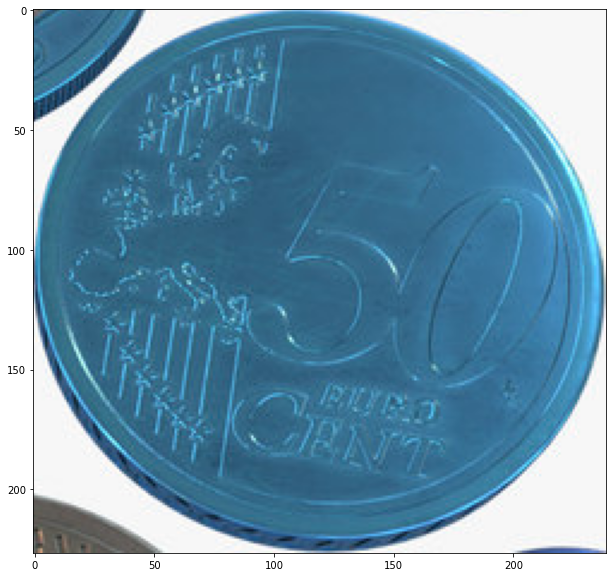

In [54]:
x,y,w,h = cv2.boundingRect(clean_contours[1])
fifty_cent_coin=img[y:y+h, x:x+w]
plt.figure(figsize=(15,10))
plt.imshow(fifty_cent_coin)

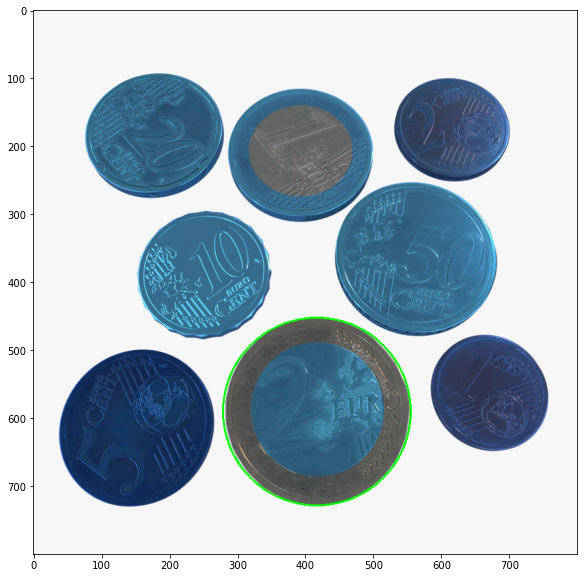

In [57]:
(x,y), radius= cv2.minEnclosingCircle(clean_contours[0])
copy=img.copy()
x,y, radius= int(x),int(y),int(radius)
cir=cv2.circle(copy,(x,y), radius,(0,255,0), 2)
plt.figure(figsize=(15,10))
plt.imshow(cir)